# Importar librerías y cargar datos


In [1]:
import sys
import os
import importlib

sys.path.insert(0,'../utils')

import pandas as pd
import numpy as np
from eda import load_data, explore_data
from data_preprocessing import preprocess_data_dbscan, preprocess_data_kmeans, reduce_dimensionality, preprocess_data_spectral
from model import evaluate_model, apply_spectral_clustering, find_optimal_clusters, find_best_k, apply_kmeans, evaluate_clustering, save_model, find_optimal_eps, apply_dbscan
from visualization import visualize_clusters_kmeans, visualize_clusters_dbscan, plot_cluster_distribution, plot_clusters_kmeans, plot_clusters_spectral

In [2]:
df = load_data('../data_sample/gym_members_exercise_tracking.csv')

In [3]:
df.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39


# Exploración de datos (EDA)

Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            973 non-null    int64  
 1   Gender                         973 non-null    object 
 2   Weight (kg)                    973 non-null    float64
 3   Height (m)                     973 non-null    float64
 4   Max_BPM                        973 non-null    int64  
 5   Avg_BPM                        973 non-null    int64  
 6   Resting_BPM                    973 non-null    int64  
 7   Session_Duration (hours)       973 non-null    float64
 8   Calories_Burned                973 non-null    float64
 9   Workout_Type                   973 non-null    object 
 10  Fat_Percentage                 973 non-null    float64
 11  Water_Intake (liters)          973 non-null    float64
 12  Workout_Frequency (days/w

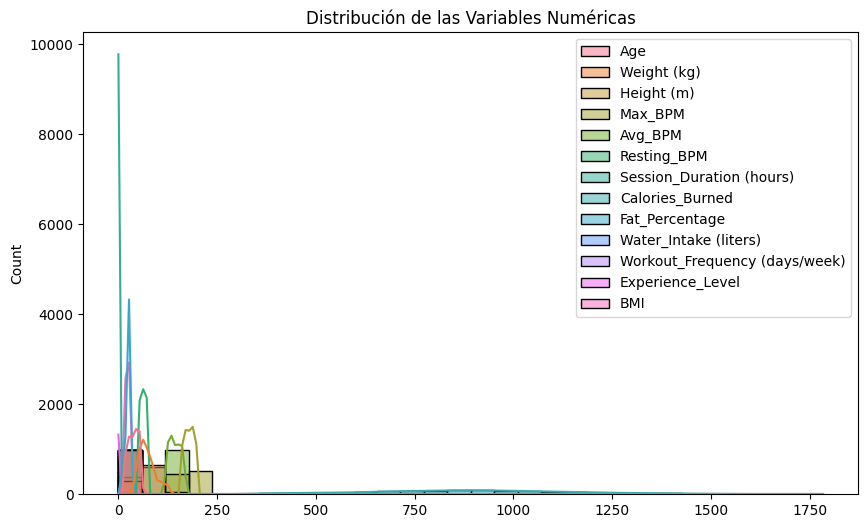

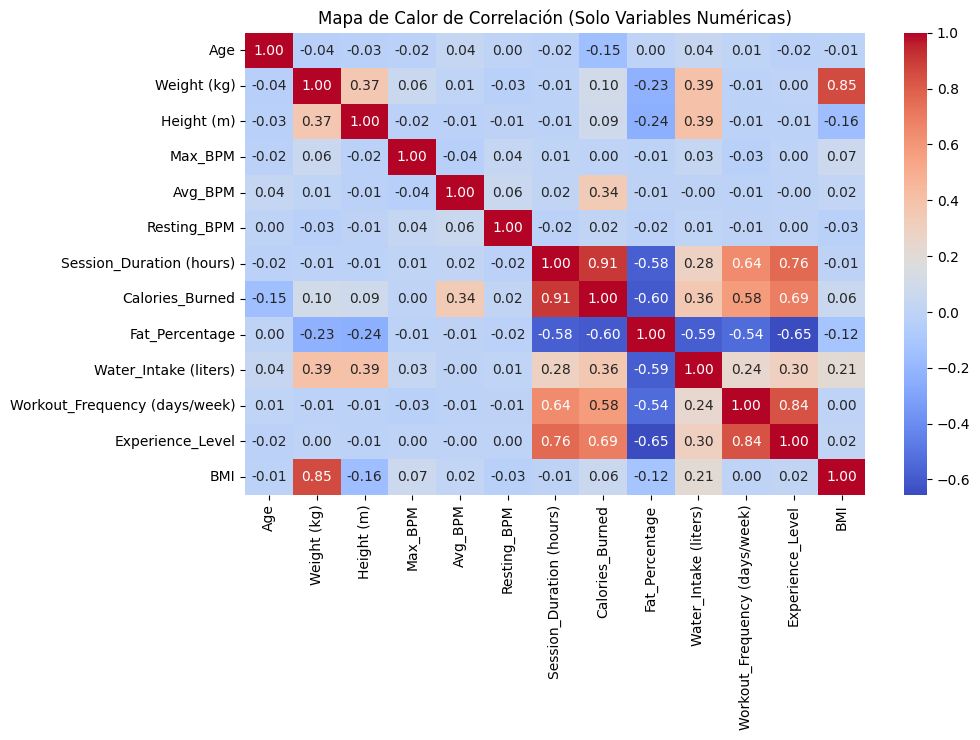

In [4]:
explore_data(df)

# Modelo K-Means

## Preprocesamiento

In [5]:
# K-Means
df_processed_kmenas = preprocess_data_kmeans(df)

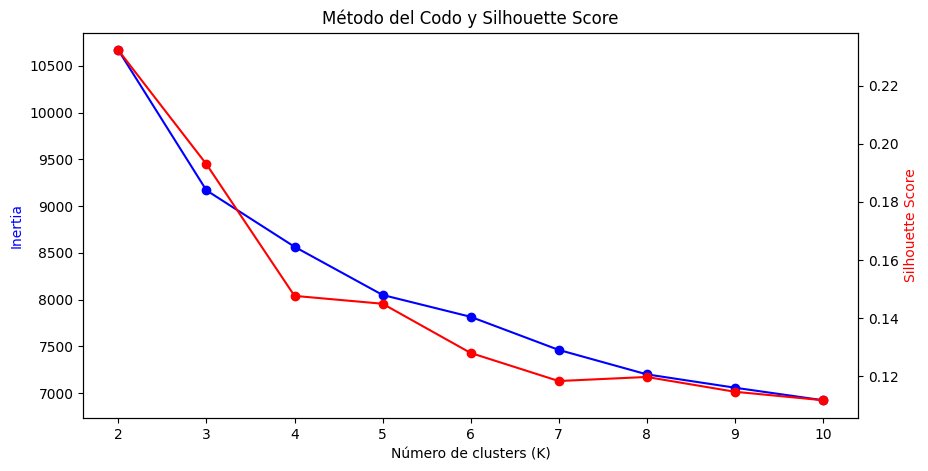

In [6]:
find_optimal_clusters(df_processed_kmenas, k_range=range(2, 11))

## Aplicar modelos de clustering

In [7]:
# K-Means
n_clusters = 4  # Valor determinado de acuerdo a las pruebas
model_kmeans = apply_kmeans(df_processed_kmenas, n_clusters)
labels = model_kmeans

## Visualización de los Clusters

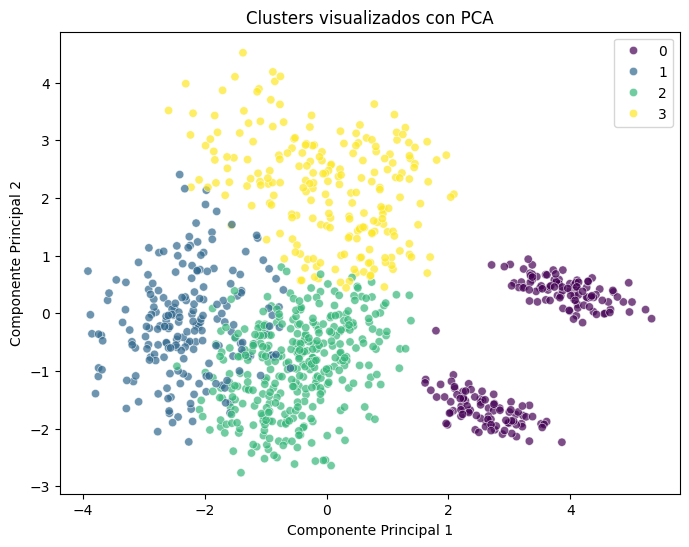

In [8]:
visualize_clusters_kmeans(df_processed_kmenas, labels)

## Evaluación del modelo

In [9]:
evaluate_clustering(df_processed_kmenas, labels)

Silhouette Score: 0.1476
Davies-Bouldin Score: 2.1614
Calinski-Harabasz Score: 183.5502


# Modelo DBSCAN

## Preprocesamiento

In [10]:
df_dbscan, df_scaled = preprocess_data_dbscan(df)
df_pca = reduce_dimensionality(df_scaled)

## Aplicar modelos de clustering y Evaluación del modelo

In [11]:
eps_range = np.arange(0.1, 2.0, 0.1)
min_samples_range = range(2, 10)

best_eps, best_min_samples, model_dbscan = apply_dbscan(df_pca, eps_range, min_samples_range)

df_dbscan['Cluster'] = model_dbscan

Mejor eps: 0.6, Mejor min_samples: 2, Mejor Silhouette Score: 0.42350428805563334


## Visualización de los Clusters


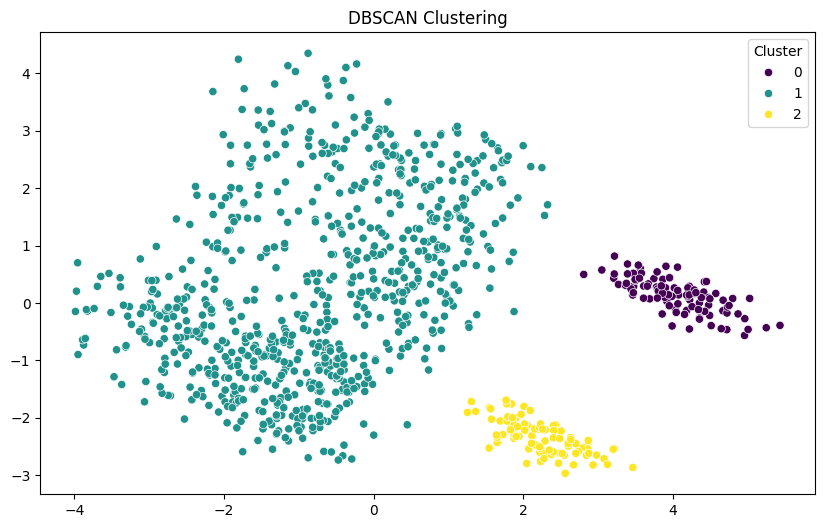

In [13]:
visualize_clusters_dbscan(df_pca, df_dbscan['Cluster'])


# Modelo Spectral Clustering

## Preprocesamiento


In [14]:
df_scaled = preprocess_data_spectral(df)
df_pca = reduce_dimensionality(df_scaled, n_components=2)

## Aplicar modelos de clustering


c:\Users\PC ELITE\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
c:\Users\PC ELITE\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
c:\Users\PC ELITE\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
c:\Users\PC ELITE\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
c:\Users\PC ELITE\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_sp

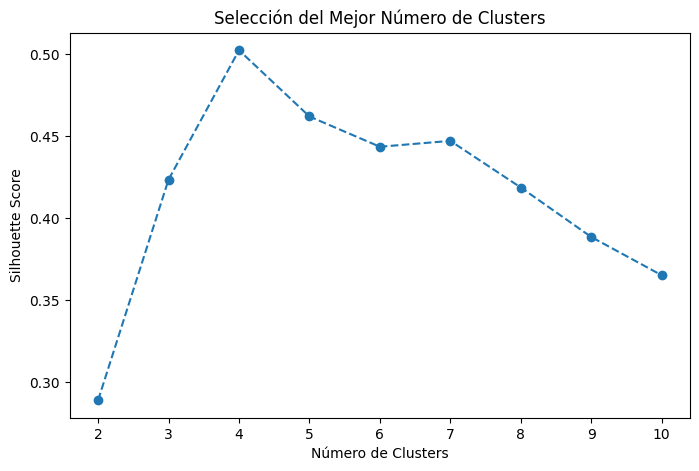

Mejor número de clusters: 4


In [15]:
# Selección del mejor número de clusters
best_k = find_best_k(df_pca)

In [16]:
model_spectral = apply_spectral_clustering(df_pca, best_k)


c:\Users\PC ELITE\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


## Evaluación del modelo

In [17]:
evaluate_model(df_pca, model_spectral)

Valor final del Silhouette Score: 0.5024690966873062


0.5024690966873062

## Visualización de los Clusters


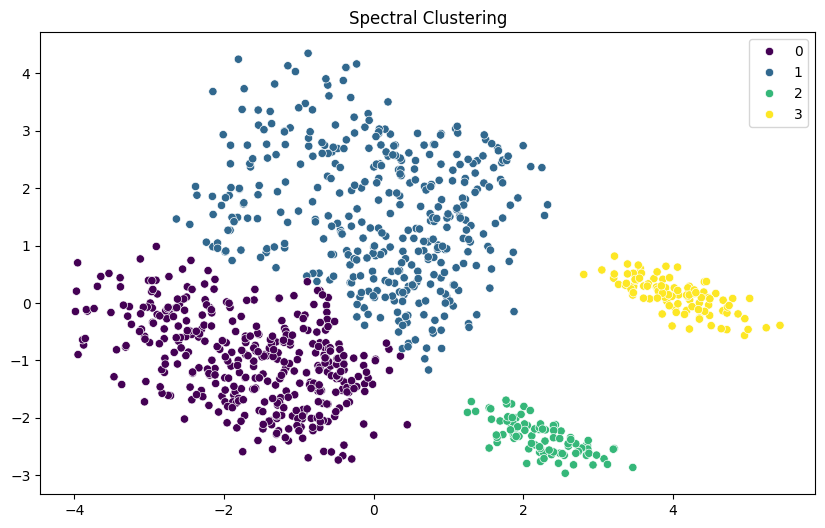

In [18]:
plot_clusters_spectral(df_pca, model_spectral)


# Guardar los modelos entrenados

In [19]:
# Guardar el modelo
save_model(model_kmeans, '../models/kmeans_model.pkl')
save_model(model_dbscan, '../models/dbscan_model.pkl')
save_model(model_spectral, '../models/spectral_model.pkl')

print("Modelos guardados exitosamente.")


Modelo guardado como ../models/kmeans_model.pkl
Modelo guardado como ../models/dbscan_model.pkl
Modelo guardado como ../models/spectral_model.pkl
Modelos guardados exitosamente.
